In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
data = pd.read_csv('kerala.csv')
data.head

<bound method NDFrame.head of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9  

In [15]:
data.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [16]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [17]:
 
X = data[['YEAR','JAN','FEB','MAR','APR','MAY'	,'JUN',	'JUL','AUG'	,'SEP',	'OCT',	'NOV',	'DEC']]

y = data['FLOODS']

<Figure size 72x216 with 0 Axes>

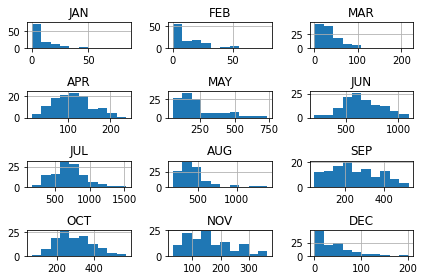

In [18]:
c = data[['JAN','FEB','MAR','APR','MAY'	,'JUN',	'JUL','AUG'	,'SEP',	'OCT',	'NOV',	'DEC']]
fig = plt.figure(figsize=(1,3))
fig.suptitle("Rainfall Amount By Month")
c.hist()
plt.tight_layout(h_pad=1)


plt.show()

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
acc_knn = knn.score(X_test,y_test) * 100
acc_knn

C:\Users\Alagözler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alagözler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


83.33333333333334

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train ,y_train)
predictions_log = logreg.predict(X_test)
acc_log = logreg.score(X_test, y_test) * 100
coeff_df = pd.DataFrame(X_test.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
print(coeff_df.sort_values(by='Correlation', ascending=False) ,end="\n\n")
acc_log

   Feature  Correlation
4      APR     0.151943
3      MAR     0.146452
5      MAY     0.134363
7      JUL     0.132344
9      SEP     0.128181
8      AUG     0.127158
6      JUN     0.125203
11     NOV     0.100256
10     OCT     0.084547
1      JAN     0.071964
12     DEC     0.022201
2      FEB    -0.068776
0     YEAR    -0.180986



C:\Users\Alagözler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


95.83333333333334

In [22]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
predictions_dectree = dectree.predict(X_test)
acc_dectree = dectree.score(X_test,y_test) * 100
acc_dectree

79.16666666666666

In [23]:
rfc = RandomForestClassifier(max_depth=3,random_state=0)
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)
acc_rfc = rfc.score(X_test,y_test) * 100
acc_rfc

79.16666666666666

In [24]:
models = []
models.append(('KNN', acc_knn))
models.append(('LR', acc_log))
models.append(('DT', acc_dectree))
models.append(('RF', acc_rfc))

max = 0
selectedModel =''
for i,j in models:
    if j > max:
        selectedModel = i
        max = j
    print(f'{i}:{j}')
    

KNN:83.33333333333334
LR:95.83333333333334
DT:79.16666666666666
RF:79.16666666666666
